In [1]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target

data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [3]:
target *= 100
target.head()

0    452.6
1    358.5
2    352.1
3    341.3
4    342.2
Name: MedHouseVal, dtype: float64

In [4]:
# training error vs testing error
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(data, target)

DecisionTreeRegressor(random_state=0)

In [5]:
from sklearn.metrics import mean_absolute_error

target_predicted = regressor.predict(data)
score = mean_absolute_error(target, target_predicted)
score

7.223851146894351e-15

In [6]:
# using train test split
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data,
    target,
    test_size=0.3,
    random_state=0
)

In [7]:
regressor.fit(data_train, target_train)

DecisionTreeRegressor(random_state=0)

In [8]:
# evaluating on testing
target_predicted = regressor.predict(data_test)
score = mean_absolute_error(target_test, target_predicted)
score

46.90979715762275

In [9]:
# using cross validation to better evaluate the performance of the model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=40, test_size=0.3, random_state=0)
cv_results = cross_validate(regressor, data, target, cv=cv, scoring='neg_mean_absolute_error')


In [11]:
import pandas as pd

cv_results = pd.DataFrame(cv_results)
cv_results.head()

,fit_time,score_time,test_score
0,0.104591,0.002294,-46.909797
1,0.118504,0.002805,-46.421170
2,0.108898,0.002706,-47.411089
3,0.102925,0.002368,-44.319824
4,0.099614,0.002267,-47.607875


**Score will be maximized and error will be minimized!**

In [12]:
cv_results["test_error"] = -cv_results["test_score"]
cv_results.head()

,fit_time,score_time,test_score,test_error
0,0.104591,0.002294,-46.909797,46.909797
1,0.118504,0.002805,-46.421170,46.421170
2,0.108898,0.002706,-47.411089,47.411089
3,0.102925,0.002368,-44.319824,44.319824
4,0.099614,0.002267,-47.607875,47.607875


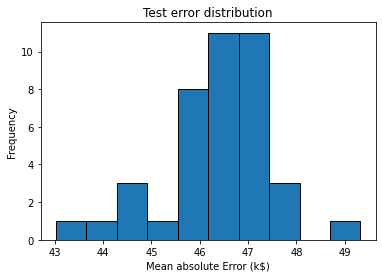

In [13]:
import matplotlib.pyplot as plt

cv_results["test_error"].plot.hist(bins=10, edgecolor="black")
plt.xlabel("Mean absolute Error (k$)")
_ = plt.title("Test error distribution")

46.36k$ +/- 1.17k$

<AxesSubplot:ylabel='Frequency'>

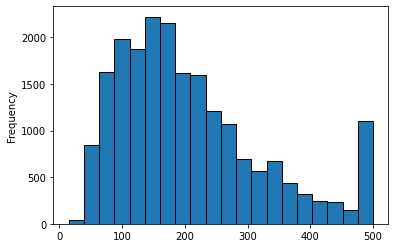

In [14]:
target.plot.hist(bins=20, edgecolor="black")

We might instead choose a metric relative to the target value to predict: the
mean absolute percentage error would have been a much better choice.